In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

import slam.motion_models.odometry_model as odom
from slam.data import read_simple_world, read_simple_data
from slam.utils import normalize_angle, sample_normal_distribution
from slam.robot import BaseRobot
from slam.map import LandmarkMap
from slam.ekf_localization import EKFLocalizationKnown

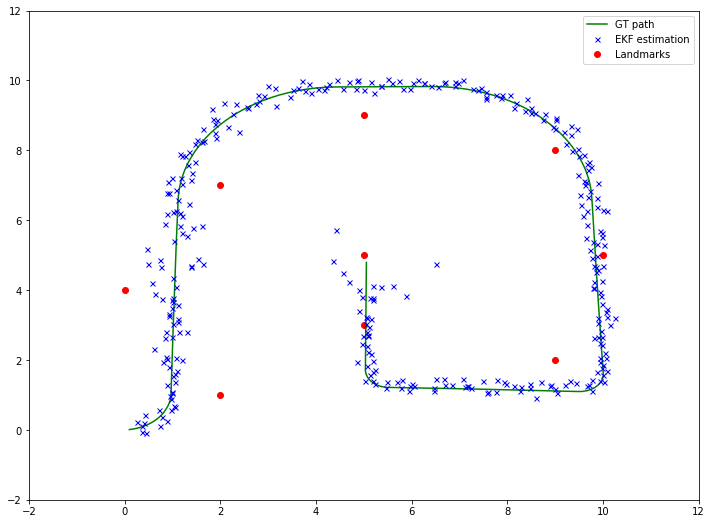

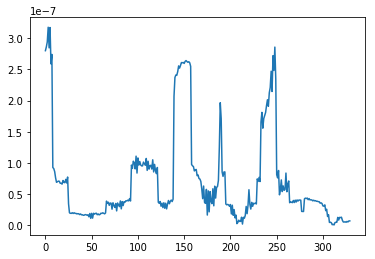

In [3]:
robot = BaseRobot(0, 0, 0, odom.odometry_command)

odometry, sensor = read_simple_data('../data/simple/sensor_data.dat')
landmarks = read_simple_world('../data/simple/world.dat')

landmark_map = LandmarkMap(landmarks)
commands = [np.array(odom).T for odom in odometry]

EKF = EKFLocalizationKnown(robot.pose, odom.odometry_command)

# Plot true robot path
x = []
y = []
EKF_x = []
EKF_y = []
cov_dets = []
landmark_x = []
landmark_y = []

plt.figure(figsize=(12, 9), )
plt.xlim((-2, 12))
plt.ylim((-2, 12))

for key, value in landmark_map.landmarks.items():
    landmark_x.append(value[0])
    landmark_y.append(value[1])

for command, readings in zip(commands, sensor):  
    # True path
    robot.motion_command(command)
    x.append(robot.pose.item(0))
    y.append(robot.pose.item(1))
    
    EKF.predict(command)
    EKF.correct(readings, landmark_map)
    
    EKF_x.append(EKF.mean.item(0))
    EKF_y.append(EKF.mean.item(1))
    cov_dets.append(np.linalg.det(EKF.cov))
    
plt.plot(x, y, 'g', zorder=1, label='GT path')    
plt.plot(EKF_x, EKF_y, 'bx', markersize=5, zorder=2, label='EKF estimation')
plt.plot(landmark_x, landmark_y, 'ro', zorder=0, label='Landmarks')
plt.legend()

plt.figure()
plt.plot(cov_dets)